In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import pandas as pd

In [10]:
df = pd.read_csv('Originaldata.txt', delimiter=' ')

In [14]:
df.head()
# observations are per month
# all in meters except W
# Response - upper limit of kelp
# OD - orbital displacement
# BD - breaking depth
# LTD - minimum tidal height
# W - wind velocity onshore


,Response,OD,BD,LTD,W
0,3.241,2.0176,4.87,-0.59,-4.1
1,3.032,1.9553,4.78,-0.75,4.7
2,3.100,1.8131,3.14,-0.38,-4.9
3,3.156,2.5751,3.28,-0.16,-3.2
4,3.110,2.2589,3.28,0.01,5.6


<IPython.core.display.Javascript object>


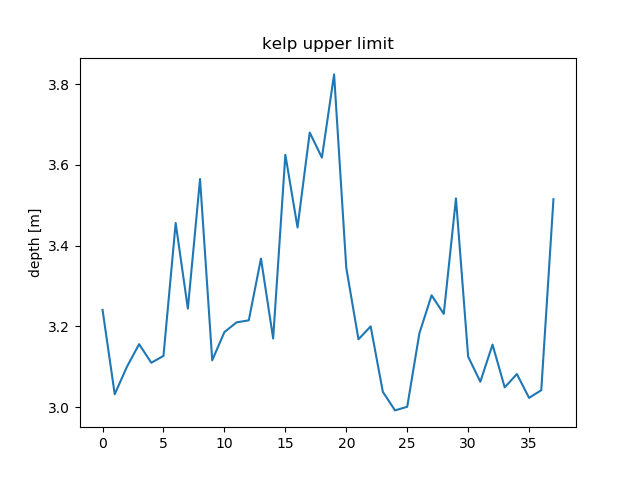

Text(0,0.5,'depth [m]')

In [13]:
plt.figure()
plt.plot(df.index, df['Response'])
plt.title('kelp upper limit')
plt.ylabel('depth [m]')

<IPython.core.display.Javascript object>


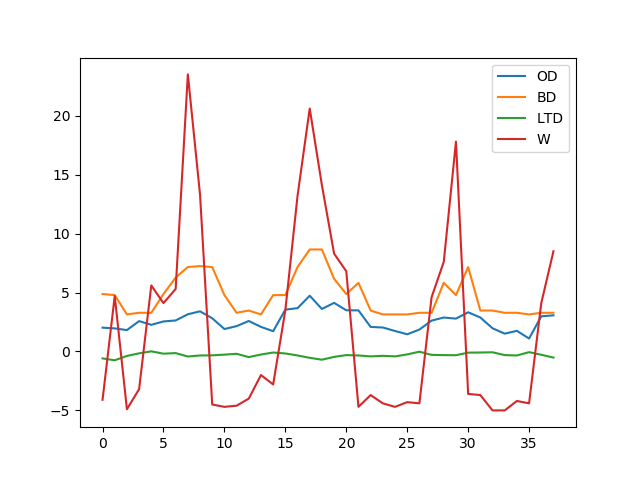

<IPython.core.display.Javascript object>


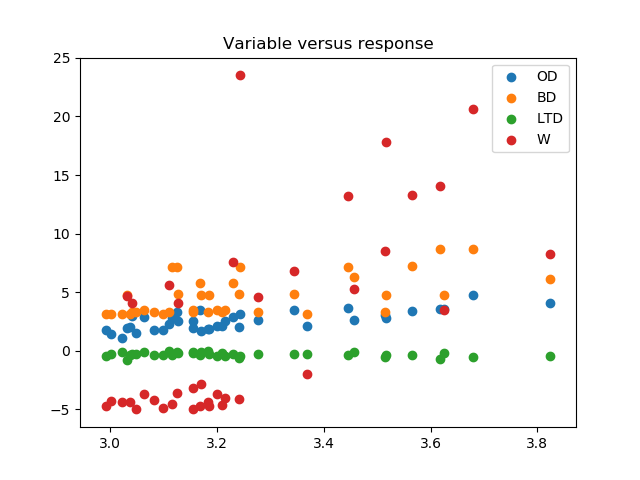

In [41]:
plt.figure()
plt.plot(df.index, df['OD'])
plt.plot(df.index, df['BD'])
plt.plot(df.index, df['LTD'])
plt.plot(df.index, df['W'])
plt.legend()
plt.figure()
plt.scatter(df['Response'], df['OD'])
plt.scatter(df['Response'], df['BD'])
plt.scatter(df['Response'], df['LTD'])
plt.scatter(df['Response'], df['W'])
plt.title('Variable versus response')
plt.legend()

<IPython.core.display.Javascript object>


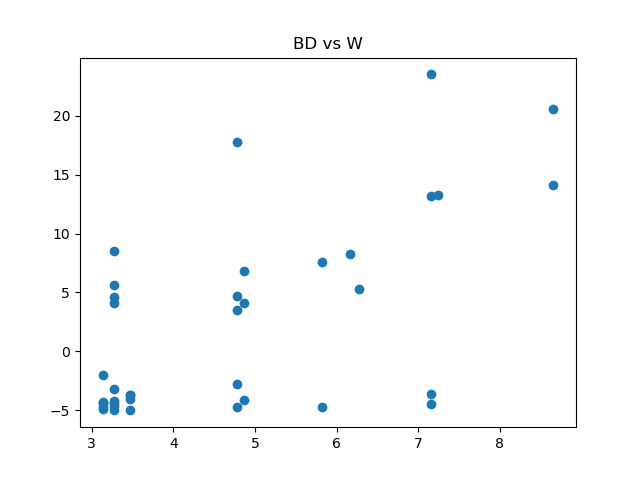

<IPython.core.display.Javascript object>


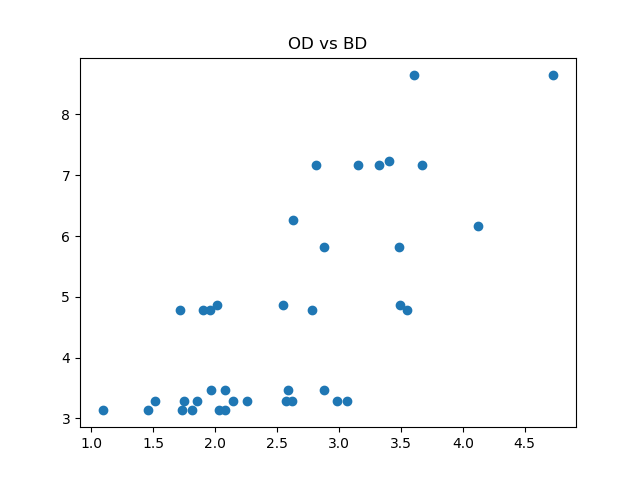

Text(0.5,1,'OD vs BD')

In [20]:
plt.figure()
plt.scatter(df['BD'], df['W'])
plt.title('BD vs W')
plt.figure()
plt.scatter(df['OD'], df['BD'])
plt.title('OD vs BD')

In [22]:
data = df.as_matrix()  # all into a numpy array (5 columns)
np.shape(data)

(38, 5)

In [23]:
env_data = data[:, 1:]  # all except first column, which is response
np.shape(env_data)

(38, 4)

In [57]:
# STEP 1
# Covariance matrix includes std deviations (which have units).  Here, all units vary, and large
# variation may not mean its important, so better to use a correlation matrix.
# Only use covariance when big=important, i.e. with identical types of measurements.
# NO - standardize variables to z-scores.
# z = (x - xbar)/stdev
# Broadcast - if number of columns matches, things like addition work.
env_data_normalized = (env_data - np.mean(env_data, 0)) / np.std(env_data, 0, ddof=1)

[ -5.20051838e-16   1.34395419e-16   1.98671489e-16   4.09029535e-17]
[ 0.98675438  0.98675438  0.98675438  0.98675438]


<IPython.core.display.Javascript object>


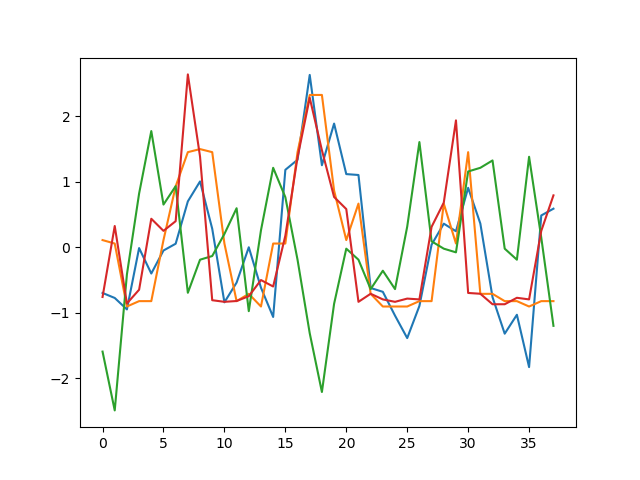

In [58]:
print(np.mean(env_data_normalized, 0))
print(np.std(env_data_normalized, 0))
plt.figure()
plt.plot( env_data_normalized[:, 0])
plt.plot( env_data_normalized[:, 1])
plt.plot( env_data_normalized[:, 2])
plt.plot( env_data_normalized[:, 3])
plt.legend()

In [60]:
# STEP 2 - covariance or correlation matrix.
# since data is standardized, the two are the same!
# Second argument lets it know that variables are in columns.
R = np.corrcoef(env_data_normalized, rowvar=False)
# Same, since standardized: R = np.cov(env_data_normalized, rowvar=False)
print(R)  # note that diagonal is all 1

[[ 1.          0.72834006 -0.28090584  0.68143749]
 [ 0.72834006  1.         -0.33859444  0.63372787]
 [-0.28090584 -0.33859444  1.         -0.3565089 ]
 [ 0.68143749  0.63372787 -0.3565089   1.        ]]


In [62]:
# STEP 3 get eigenvectors and eigenvalues 
val, vec = linalg.eig(R)
print(vec) # row is a vector (on a new axis) of length one, column is a component.

[[-0.54799191 -0.29010584  0.76825404 -0.15915149]
 [-0.545347   -0.17936923 -0.57706165 -0.58088137]
 [ 0.33846526 -0.93353908 -0.09720099  0.06706729]
 [-0.53641661 -0.11031802 -0.25949479  0.7954556 ]]


In [65]:
val = np.real(val)
print(val)

[ 2.56536859  0.80551944  0.25828926  0.37082272]


In [66]:
print(np.diag(val))  # if you need matrix form

[[ 2.56536859  0.          0.          0.        ]
 [ 0.          0.80551944  0.          0.        ]
 [ 0.          0.          0.25828926  0.        ]
 [ 0.          0.          0.          0.37082272]]


In [71]:
# Want to know percent of variance accounted for by each component.
# Note that val containes variances so it's just the percent of the sum.
# Biggest isn't always first, as here.
pct_acct = 100*val/np.sum(val)
print(pct_acct) 

[ 64.13421463  20.13798595   6.45723148   9.27056795]


In [72]:
# What about transforming data to the new axes?
# How to visualize (its 4D)?
# Look at factor loadings.
# A = V (sqrt(Lambda))
# V = eigenvectors
# Lambda = eigenvalue matrix
A = np.matmul(vec, np.diag(val)**0.5)
print(A)

[[-0.87770594 -0.26037212  0.39044335 -0.09691564]
 [-0.87346965 -0.1609852  -0.29327523 -0.35372896]
 [ 0.54211195 -0.83785818 -0.04939965  0.04084077]
 [-0.85916604 -0.09901124 -0.13188087  0.4843944 ]]


In [74]:
print('PC1 loading')
# Shows OD, BD, W fairly equal, LTD smaller and opposite sign.
print(A[:, 0])
print('OD', 'BD', 'LTD', 'W')

PC1 loading
[-0.87770594 -0.87346965  0.54211195 -0.85916604]
OD BD LTD W


<IPython.core.display.Javascript object>


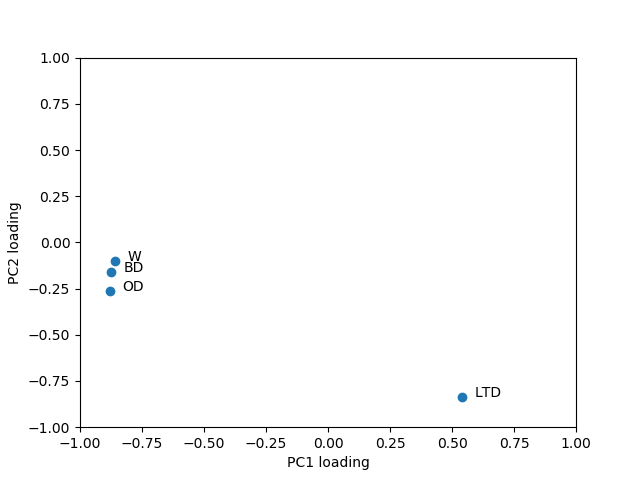

In [79]:
# Another way: plot PC1 vs PC2
# Note how wind/wave-related variables cluster and dominate PC1.
# A winter storm index?
# Tide is the big variable in PC2.
plt.figure()
plt.plot(A[:, 0], A[:, 1], 'o')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')
variables = ['OD', 'BD', 'LTD', 'W']
for i, txt in enumerate(variables):
    plt.text(A[i,0]+0.05,A[i,1],txt)

In [82]:
# Last thing - what is the time series of the storm index
# Principal component score (tau)
tau = np.matmul(env_data_normalized, vec)
print(np.shape(tau))
# New matrix, same size as data matrix (38x4).
# Each row is an observation, but each column is a principal component, first is storm index.
# second is primarily tides.  Others less important.

(38, 4)


<IPython.core.display.Javascript object>


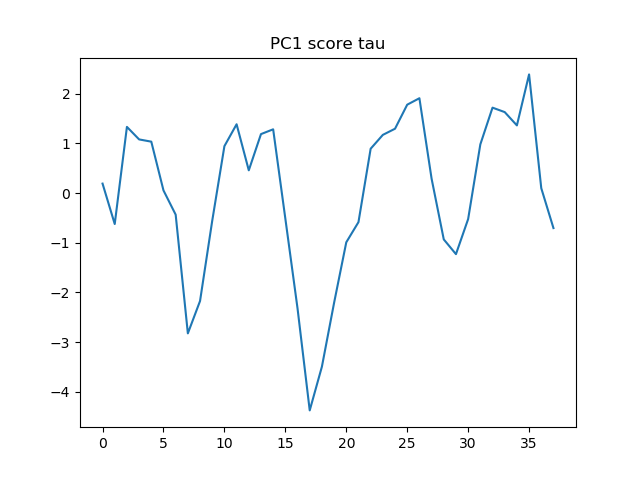

In [85]:
# Plot PC scores as a function of time
# compare to original variables
# compare to response variable to see if it actually is explained
plt.figure()
plt.plot(tau[:,0])
plt.title('PC1 score tau')
plt.legend()

<IPython.core.display.Javascript object>


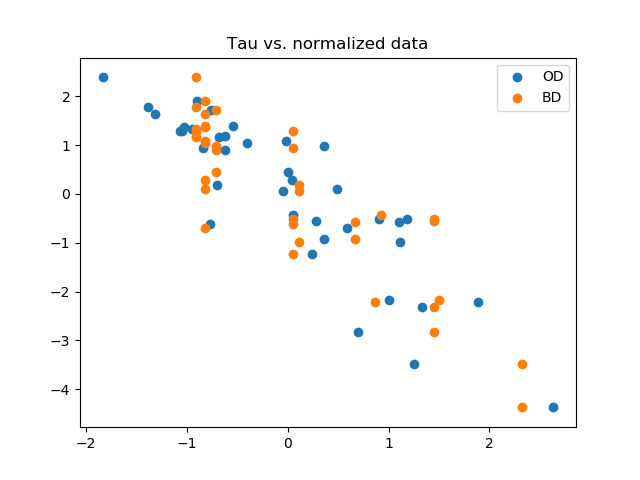

<IPython.core.display.Javascript object>


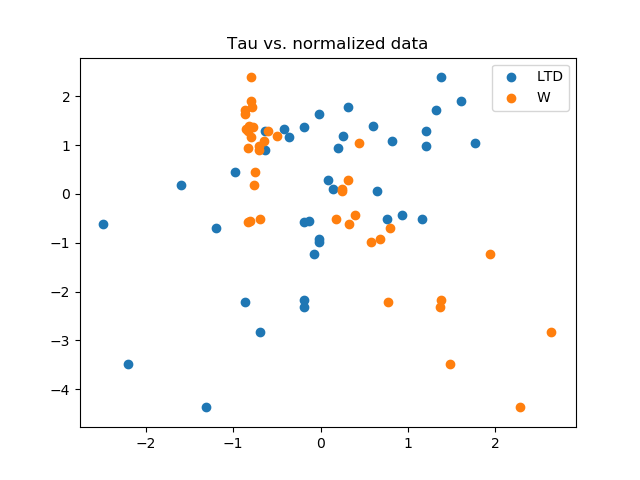

In [92]:
plt.figure()
plt.scatter(env_data_normalized[:, 0], tau[:, 0], label='OD')
plt.scatter(env_data_normalized[:, 1], tau[:, 0], label='BD')
plt.title('Tau vs. normalized data')
plt.legend()
plt.figure()
plt.scatter(env_data_normalized[:, 2], tau[:, 0], label='LTD')
plt.scatter(env_data_normalized[:, 3], tau[:, 0], label='W')
plt.title('Tau vs. normalized data')
plt.legend()


<IPython.core.display.Javascript object>


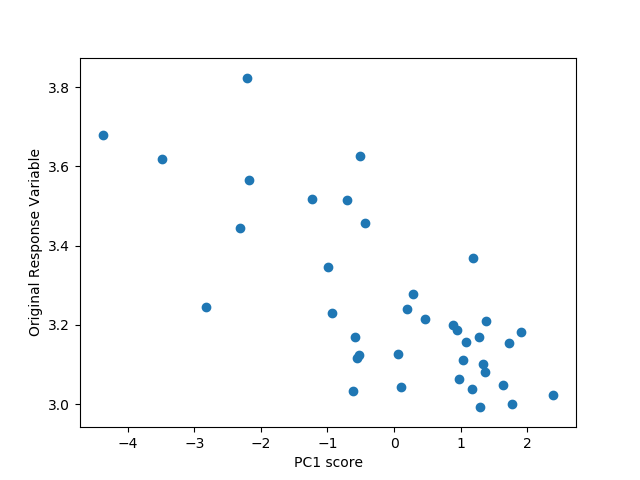

Text(0,0.5,'Original Response Variable')

In [91]:
# Compare result to response variable.
plt.figure()
plt.scatter(tau[:, 0], data[:, 0] )
plt.xlabel('PC1 score')
plt.ylabel('Original Response Variable')

<IPython.core.display.Javascript object>


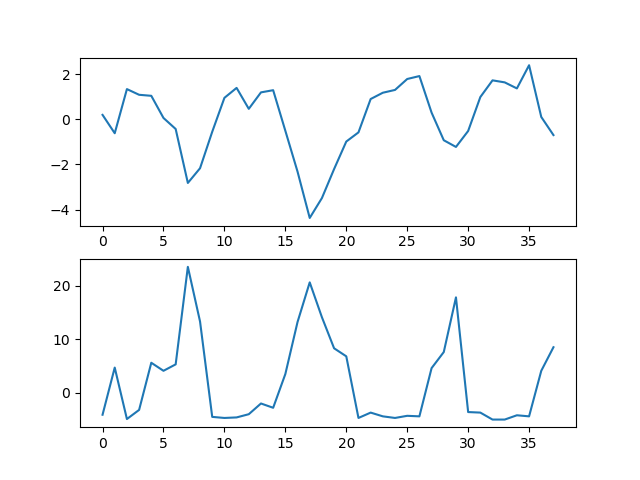

In [94]:
# Last plot by Tom
# compare index to variable - W accounts for most of variance
plt.figure()
plt.subplot(211)
plt.plot(tau[:, 0])
plt.subplot(212)
plt.plot(env_data[:, 3])

# factor loadings show clustering
# (several above)
